# Lab | Cleaning numerical data

#### 1. Import the necessary libraries.

In [275]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df



In [276]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

#### 3. First look at its main features (head, shape, info).



In [277]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [278]:
customer_df.shape

(9134, 24)

In [279]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [280]:
def lowercase(data):
    lower_case_columns = []
    for columns in data.columns:
        lower_case_columns.append(columns.lower())
    data.columns = lower_case_columns
    return data
# lowercase(customer_df)

In [281]:
def snake_case(data):
    lower_case_columns = []
    for columns in data.columns:
        # if ' ' in columns:
        #     columns = columns.replace(' ', '_')   # This is the same but iterating
        lower_case_columns.append(columns.lower())
        
    data.columns = lower_case_columns
    data.columns = data.columns.str.replace(' ','_')
    return data

In [282]:
snake_case(customer_df).head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 5. Change effective to date column to datetime format.



In [283]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
# customer_df['months'] = customer_df['effective_to_date'].dt.month

In [284]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [285]:
customer_df.tail()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2011-02-14,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


#### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df



General solution for counting the values of wach columns

In [286]:
def unique_values(data):
    for column in data.columns:
        print(column, len(data[column].unique()))

In [287]:
unique_values(customer_df)

customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


Specific solution

In [288]:
for column in customer_df.columns:
    print(column, len(customer_df[column].unique()))

# The same operation, different function

# for column in customer_df.columns:
#     print(column, len(customer_df[column].value_counts()))

customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [289]:
customer_df.shape[0]*0.01

91.34

We can see from the number of unique values that each column has which one is discrete and which one continuous

In [290]:
def c_d(data):
    
    discrete = pd.DataFrame()
    continuous = pd.DataFrame()
    
    for name in data.columns:
        if len(data[name].unique()) < data.shape[0]*0.01:
            discrete[name]=data[name]
        else:
            continuous[name]=data[name]
            
    return discrete, continuous

discrete_df, continuous_df = c_d(customer_df)

The limit we set for the continuous and the discrete variables is 1% of the number of rows of the dataset

#### 7. Plot a correlation matrix, comment what you see.



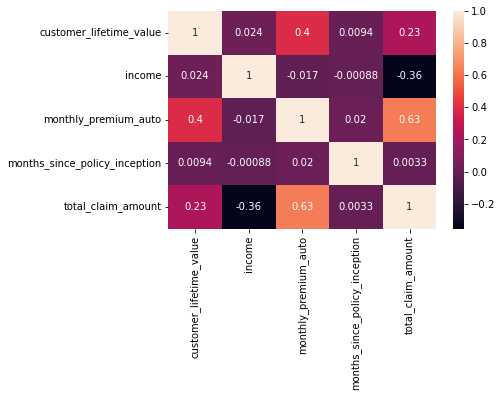

In [291]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



Discrete values plots

In [292]:
def pintar_histogramas(data):
    data.drop(['effective_to_date'], axis=1, inplace=True)
    for column in data.columns:
        print(column,'has', len(data[column].unique()), 'categories')
        sns.countplot(data[column])
        plt.show()
    return

Histograms are worth it for discrete values

state has 5 categories


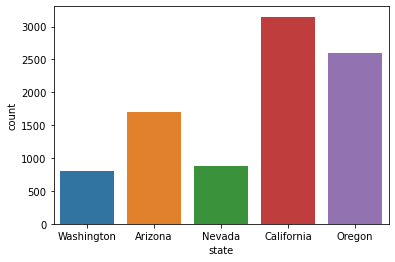

response has 2 categories


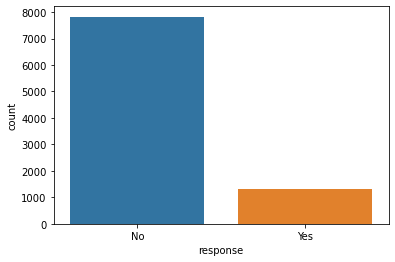

coverage has 3 categories


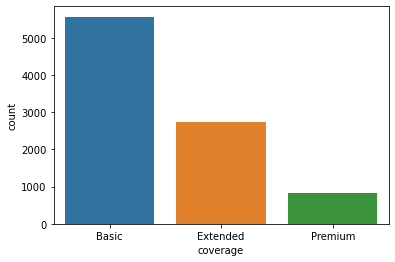

education has 5 categories


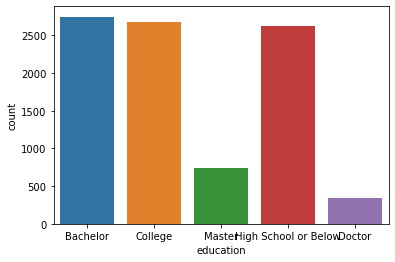

employmentstatus has 5 categories


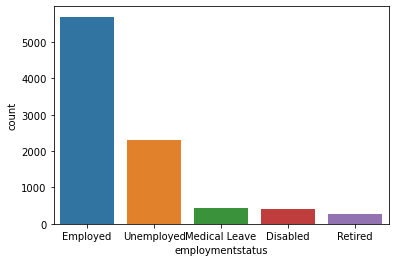

gender has 2 categories


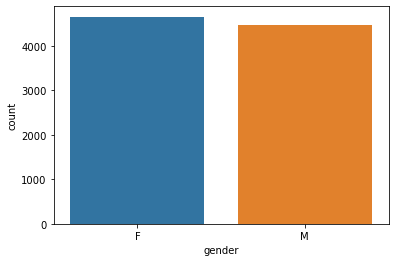

location_code has 3 categories


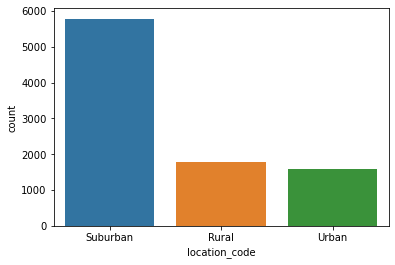

marital_status has 3 categories


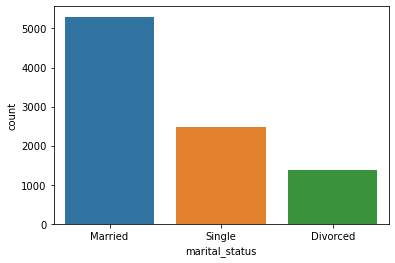

months_since_last_claim has 36 categories


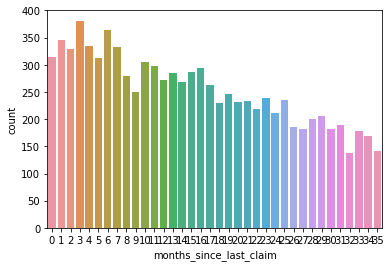

number_of_open_complaints has 6 categories


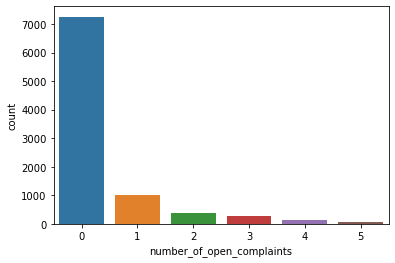

number_of_policies has 9 categories


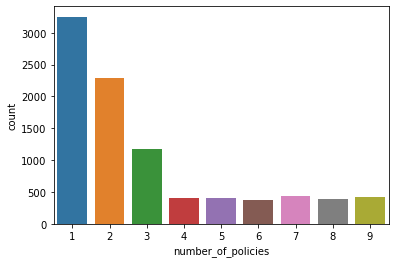

policy_type has 3 categories


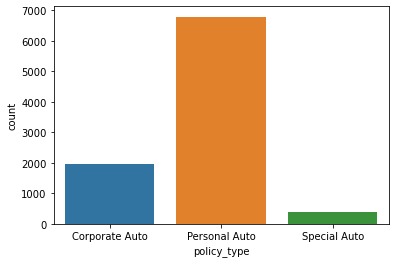

policy has 9 categories


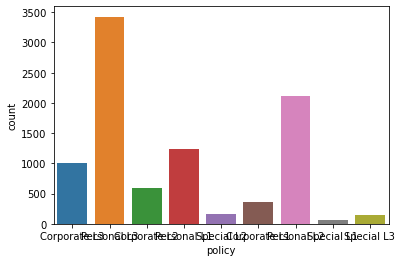

renew_offer_type has 4 categories


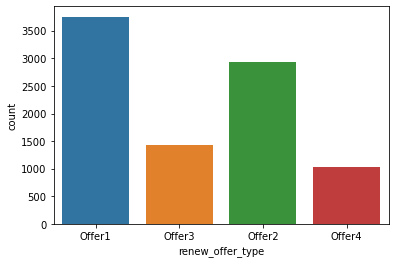

sales_channel has 4 categories


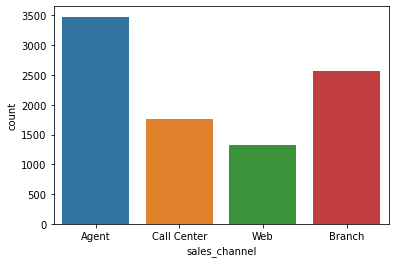

vehicle_class has 6 categories


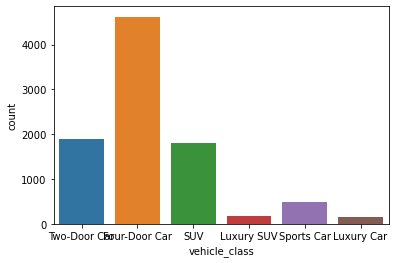

vehicle_size has 3 categories


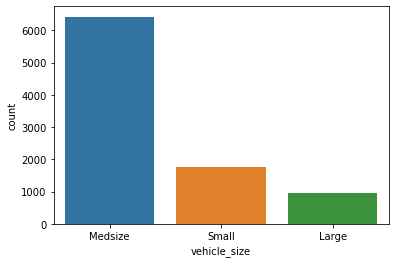

In [293]:
pintar_histogramas(discrete_df)

Continuous variables plots

In [294]:
def pintar_displot(sub_set):
    for i in sub_set.drop(['customer'], axis = 1).columns:
        sns.displot(data=sub_set, x=i, kde = True)
    return

We drop customer and effective to date due to they are meaningless to plot

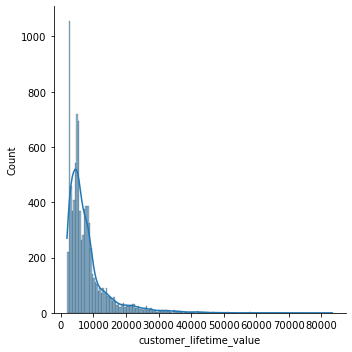

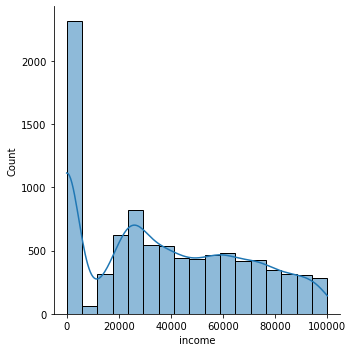

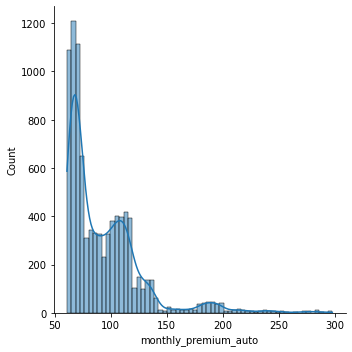

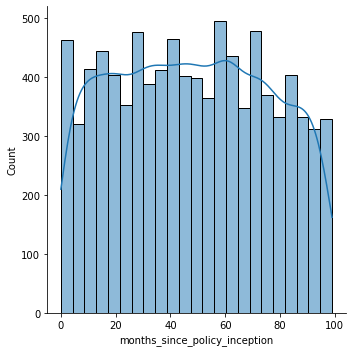

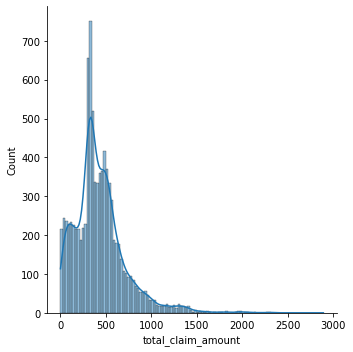

In [295]:
pintar_displot(continuous_df)

#### 9. Comment what you can see in the plots.



We can see that continuous variables refer to high volume of distinct values meanwhile discrete variables contains many information within few categories

#### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



In [296]:
def pintar_boxplot(sub_set):
    for i in sub_set.drop(['customer'], axis = 1).columns:
        print(i)
        plt.boxplot(continuous_df[i])
        plt.show()
    return

customer_lifetime_value


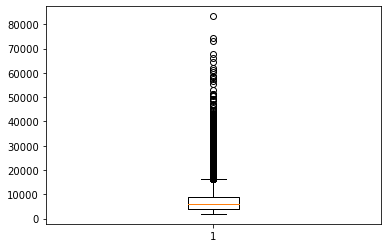

income


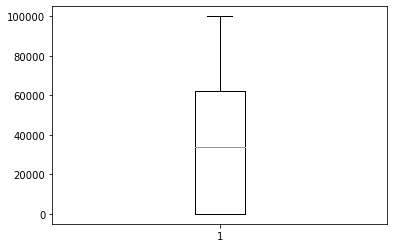

monthly_premium_auto


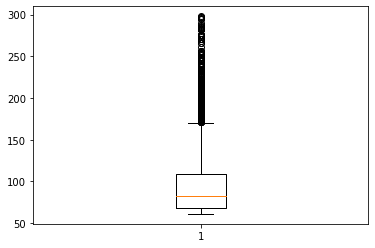

months_since_policy_inception


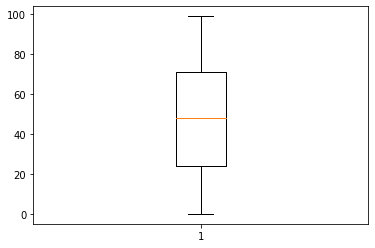

total_claim_amount


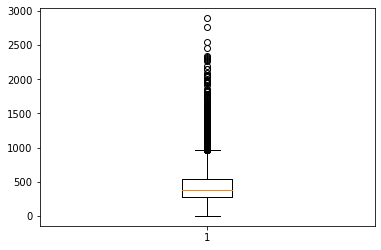

In [297]:
pintar_boxplot(continuous_df)

#### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



#### 11. Did you find outliers? Comment what you will do with them.



The only 3 that have what could be considered as outliers are the columns, customer_lifetime_value, monthly_premium_auto and total_claim_amount. Regarding the first, customer_lifetime_value, I don't think we even want to remove any client as an outlier that has a high lifetime value because it's a good client. monthly premium auto, again is a client that is a good client, that pays more for premiums so for the same reasons I see no reasons to shave them off, only if we had a really high value that would be for sure a bad input. Total_claim_amount has 50% of his values between 250 and 500 beeing the upper 75% quantile roughly 1000, climbing up to 3000. Again I see no exagerated disparities here.



#### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.


In [298]:
continuous_df.isnull().sum()


customer                         0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
dtype: int64

In [299]:
discrete_df.isnull().sum()


state                        0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
months_since_last_claim      0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
vehicle_class                0
vehicle_size                 0
dtype: int64

No Nan´s found

# Lab | Cleaning categorical data

#### 1. Import the necessary libraries.

In [300]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

#### 2. Find all of the categorical data. Save it in a categorical_df variable.



In [301]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [302]:
def snake_case(data):
    lower_case_columns = []
    for columns in data.columns:
        # if ' ' in columns:
        #     columns = columns.replace(' ', '_')   # This is the same but iterating
        lower_case_columns.append(columns.lower())
        
    data.columns = lower_case_columns
    data.columns = data.columns.str.replace(' ','_')
    return data

In [303]:
snake_case(customer_df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [304]:
categorical_df = customer_df.select_dtypes(object)

In [305]:
categorical_df.head(9)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,1/18/11,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize


#### 3. Check for NaN values.



In [306]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

It seems there are no Nan values among the categorical data

#### 4. Check all unique values of columns.



In [307]:
def unique_values(data):
    for column in data.columns:
        print(column, len(data[column].unique()))

In [308]:
unique_values(categorical_df)

customer 9134
state 5
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
location_code 3
marital_status 3
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
vehicle_class 6
vehicle_size 3


#### 5. Check dtypes. Do they all make sense as categorical data?



In [309]:
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [310]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

#### 6. Does any column contain alpha and numeric data? Decide how to clean it.



Except for effective to date, which is converted to DateTime format, the rest of the categories seem categorical

In [311]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

#### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.



In [312]:
categorical_df['effective_to_date'] = categorical_df['effective_to_date'].dt.month_name(locale="English")
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,February,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,January,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,February,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,January,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,February,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


effective_to_date is going to be formatted to month

#### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?



In [313]:
categorical_df.groupby(['policy_type','policy']).agg({'policy':'count'})

policy
policy_type    policy              
Corporate Auto Corporate L1     359
               Corporate L2     595
               Corporate L3    1014
Personal Auto  Personal L1     1240
               Personal L2     2122
               Personal L3     3426
Special Auto   Special L1        66
               Special L2       164
               Special L3       148

We observe there are 3 levels of policy within each policy type

#### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.



In [314]:
# categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car', 'Luxury SUV']), 'Luxury Car', categorical_df['vehicle_class']) 
# categorical_df['vehicle_class '].value_counts()


We would need to drop the customer column in order to encode the categorical variables. Then it would be easier to encode.


## Lab | Feature extraction

#### 1. Open the categoricals variable we created before.


In [315]:
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,February,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,January,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,February,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,January,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,February,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [316]:
categorical_df.drop(['customer'],axis=1, inplace=True)

#### 2. Plot all the categorical variables with the proper plot. What can you see?


In [317]:
def pintar_counterplots(data):
    for column in data.columns:
        print(column,'has', len(data[column].unique()), 'categories')
        sns.countplot(data[column])
        plt.show()
    return

state has 5 categories


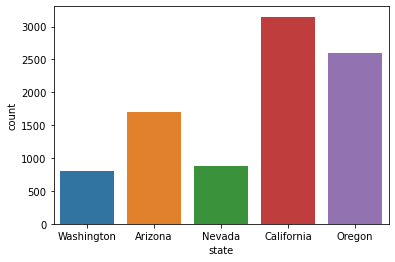

response has 2 categories


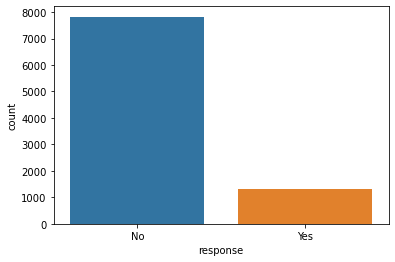

coverage has 3 categories


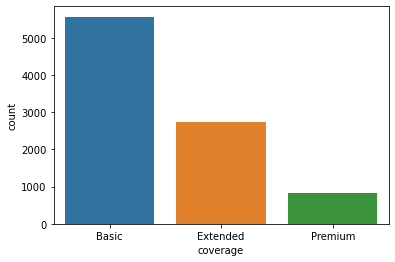

education has 5 categories


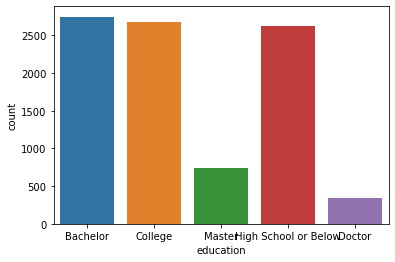

effective_to_date has 2 categories


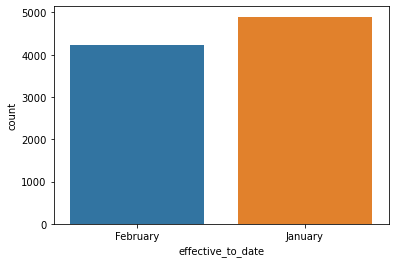

employmentstatus has 5 categories


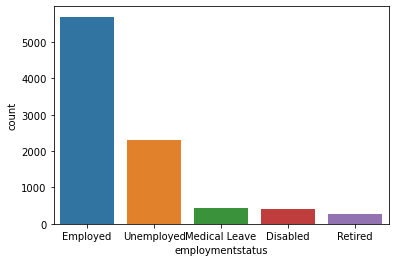

gender has 2 categories


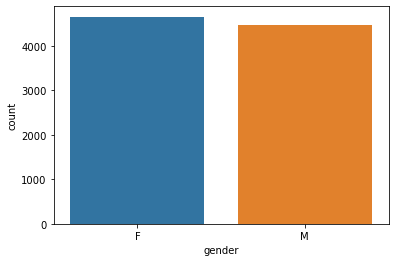

location_code has 3 categories


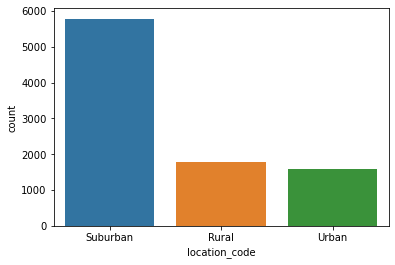

marital_status has 3 categories


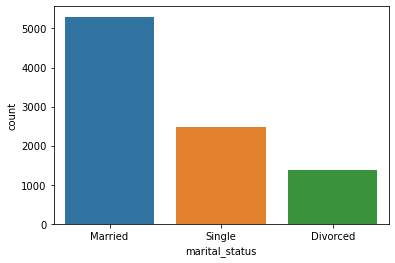

policy_type has 3 categories


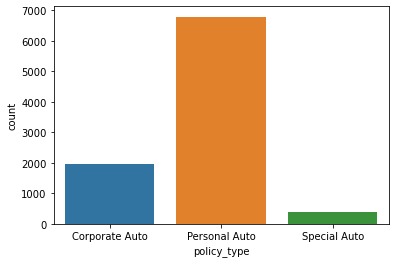

policy has 9 categories


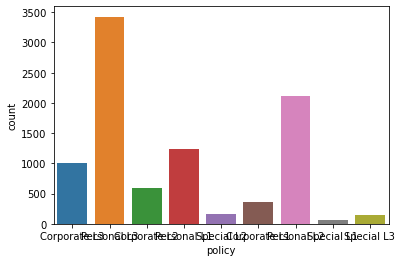

renew_offer_type has 4 categories


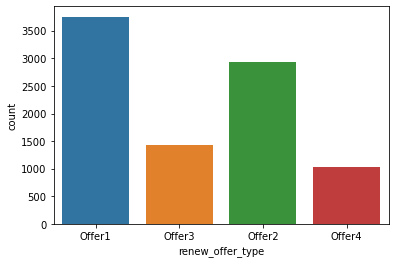

sales_channel has 4 categories


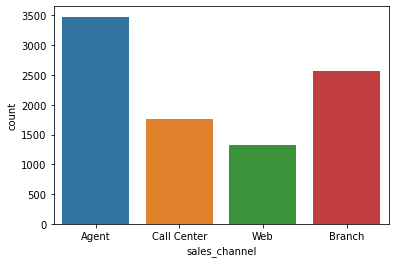

vehicle_class has 6 categories


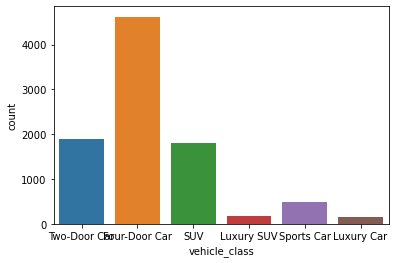

vehicle_size has 3 categories


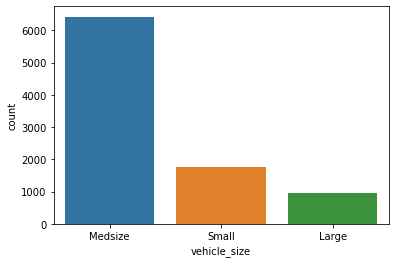

In [318]:
pintar_counterplots(categorical_df)

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?



Let´s drop them

#### 4. Plot time variable. Can you extract something from it?



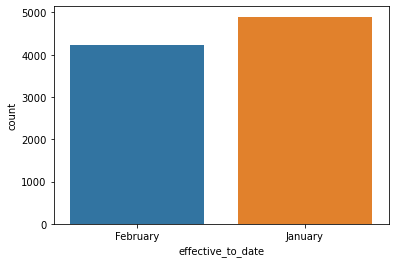

In [319]:
sns.countplot(categorical_df['effective_to_date'])
plt.show()

It seems that all the data we have is from only 2 months

# Lab Comparing regression models

#### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.



In [320]:
y = customer_df['total_claim_amount']
X = customer_df.drop(['total_claim_amount','customer'], axis=1)

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### 2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.



In [323]:
# Function to remove outliers
def rm_outliers(df, coef=1.5):
    iqr = np.percentile(df,75) - np.percentile(df,25)
    upper_limit = np.percentile(df,75) + coef*iqr
    lower_limit = np.percentile(df,25) - coef*iqr

    if lower_limit>df.min():
        return df[(df>=lower_limit) & (df<=upper_limit)].copy() 
    else:
        return df[df>=upper_limit].copy()

In [324]:
# rm_outliers(X_train['customer_lifetime_value'])

What seemed to be outliers are not, therefore we are not gonna drop them

#### 3. Create a copy of the dataframe for the data wrangling.



In [325]:
df = customer_df

#### 4. Normalize the continuous variables. You can use any one method you want.





In [326]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

In [327]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [328]:
from sklearn.preprocessing import MinMaxScaler
def EscaladorMinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [329]:
X_train_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6168,6162.198670,80590,76,26,4,0,3
8013,2772.502139,68463,70,19,67,1,1
2706,5741.727430,86641,71,17,79,0,6
6361,13081.307700,89948,110,17,53,1,2
8067,5757.442258,88997,72,9,71,0,3


In [330]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_train_escalado = EscaladorMinMax(X_train_num, MinMaxtransformer)
X_train_escalado.head()

(7307, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.052360,0.806053,0.063291,0.742857,0.040404,0.0,0.250
1,0.010731,0.684760,0.037975,0.542857,0.676768,0.2,0.000
2,0.047196,0.866575,0.042194,0.485714,0.797980,0.0,0.625
3,0.137334,0.899651,0.206751,0.485714,0.535354,0.2,0.125
4,0.047389,0.890139,0.046414,0.257143,0.717172,0.0,0.250


In [331]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_test_escalado = EscaladorMinMax(X_test_num, MinMaxtransformer)
X_test_escalado.head()

(1827, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.046745,0.507046,0.042194,0.885714,0.303030,0.0,0.500
1,0.137752,0.207089,0.464135,0.228571,0.121212,0.2,0.250
2,0.058070,0.823927,0.092827,0.800000,0.191919,0.0,0.750
3,0.075250,0.000000,0.202532,0.285714,0.202020,0.0,0.625
4,0.074036,0.325612,0.029536,0.914286,0.727273,0.0,0.125


#### 5. Encode the categorical variables (See the hint below for encoding categorical data!!!)





In [332]:
from sklearn.preprocessing import OneHotEncoder
def OneHotEncoding(data, OneHotEncoder):
    # print(OneHotEncoder.categories_)
    encoded = OneHotEncoder.transform(data).toarray()
    # print(encoded)
    onehot_encoded = pd.DataFrame(encoded)
    return onehot_encoded.head(20)

In [333]:
X_train_cat.head(1)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
6168,Oregon,No,Extended,Doctor,1/10/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer4,Agent,Four-Door Car,Medsize


In [334]:
X_train_cat.drop(['effective_to_date'],axis=1, inplace=True)
# data.drop(['effective_to_date'], axis=1, inplace=True)

In [335]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)  # Only run once

In [336]:
X_train_encoded = OneHotEncoding(X_train_cat, encoder)

In [337]:
X_test_cat.drop(['effective_to_date'],axis=1, inplace=True)


In [338]:
X_test_encoded = OneHotEncoding(X_test_cat, encoder)

In [342]:
X_entreno = pd.concat([X_train_escalado,X_train_encoded])
X_entreno

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,0,1,2,...,33,34,35,36,37,38,39,40,41,42
0,0.052360,0.806053,0.063291,0.742857,0.040404,0.0,0.250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.010731,0.684760,0.037975,0.542857,0.676768,0.2,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.047196,0.866575,0.042194,0.485714,0.797980,0.0,0.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.137334,0.899651,0.206751,0.485714,0.535354,0.2,0.125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.047389,0.890139,0.046414,0.257143,0.717172,0.0,0.250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [343]:
X_testeo = pd.concat([X_test_escalado,X_test_encoded])
X_testeo

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,0,1,2,...,33,34,35,36,37,38,39,40,41,42
0,0.046745,0.507046,0.042194,0.885714,0.303030,0.0,0.500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.137752,0.207089,0.464135,0.228571,0.121212,0.2,0.250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.058070,0.823927,0.092827,0.800000,0.191919,0.0,0.750,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.075250,0.000000,0.202532,0.285714,0.202020,0.0,0.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.074036,0.325612,0.029536,0.914286,0.727273,0.0,0.125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.





#### 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.





In [344]:
X_entreno.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
number_of_open_complaints        float64
number_of_policies               float64
0                                float64
1                                float64
2                                float64
3                                float64
4                                float64
5                                float64
6                                float64
7                                float64
8                                float64
9                                float64
10                               float64
11                               float64
12                               float64
13                               float64
14                               float64
15                               float64
16                               float64
17              

In [346]:
X_testeo.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
number_of_open_complaints        float64
number_of_policies               float64
0                                float64
1                                float64
2                                float64
3                                float64
4                                float64
5                                float64
6                                float64
7                                float64
8                                float64
9                                float64
10                               float64
11                               float64
12                               float64
13                               float64
14                               float64
15                               float64
16                               float64
17              